In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("loan_approval_data.csv")

In [4]:
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mode()[0])
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])

data.drop(["Loan_ID"] , axis=1 , inplace= True)

data = pd.get_dummies(data, columns = ["Gender","Education",'Self_Employed','Married',"Property_Area"])
data.drop(["Gender_Female" ,"Education_Not Graduate",'Self_Employed_No','Married_No','Property_Area_Rural'], axis = 1 , inplace = True )

data['Dependents'] = data['Dependents'].replace('3+' ,3)
data['Dependents']= data['Dependents'].astype(int)

In [5]:
x = data.drop(["Loan_Status"] , axis = 1)
y = data["Loan_Status"]

In [6]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train , y_test = train_test_split(x , y , train_size= 0.30 , random_state= 42)

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [8]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(solver='saga')

In [9]:
from sklearn.model_selection import GridSearchCV
parameter = {
    "penalty": ['l1','l2','elasticnet'],
    'C': [.001,.01,1,10,50,100],
    'max_iter': [10,50,100],
    'l1_ratio': [.1,.5,.8,.9]
}
classifier = GridSearchCV(Model,param_grid=parameter,scoring='accuracy' , cv = 5)
classifier.fit(x_train,y_train)

c:\Users\ansik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ansik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ansik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ansik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ansik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1196:

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.001, 0.01, 1, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.8, 0.9],
                         'max_iter': [10, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [10]:
print(classifier.best_params_)
print(classifier.best_score_)

{'C': 50, 'l1_ratio': 0.1, 'max_iter': 10, 'penalty': 'elasticnet'}
0.7828828828828829


In [11]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score , classification_report

print(accuracy_score(y_pred , y_test))
print(classification_report(y_pred , y_test))

0.8
              precision    recall  f1-score   support

           N       0.50      0.79      0.62        87
           Y       0.94      0.80      0.86       343

    accuracy                           0.80       430
   macro avg       0.72      0.80      0.74       430
weighted avg       0.85      0.80      0.81       430



In [12]:
print(x_test.shape)
print(y_test.shape)

(430, 12)
(430,)


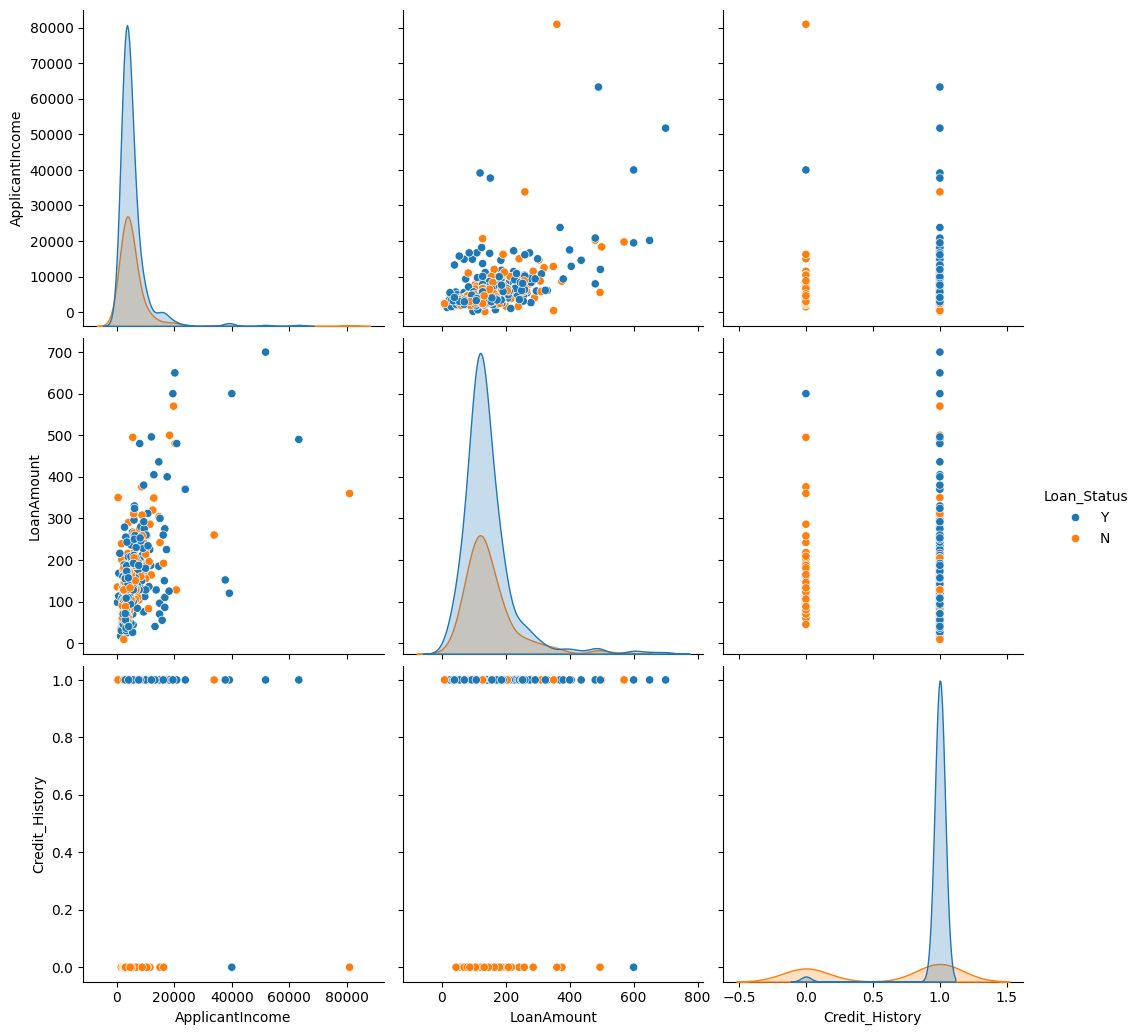

In [13]:
selected_cols = ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Status']
sns.pairplot(data[selected_cols], hue="Loan_Status", height=3.5)
plt.show()

C:\Users\ansik\AppData\Local\Temp\ipykernel_18420\805059468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=data, palette='Set2')


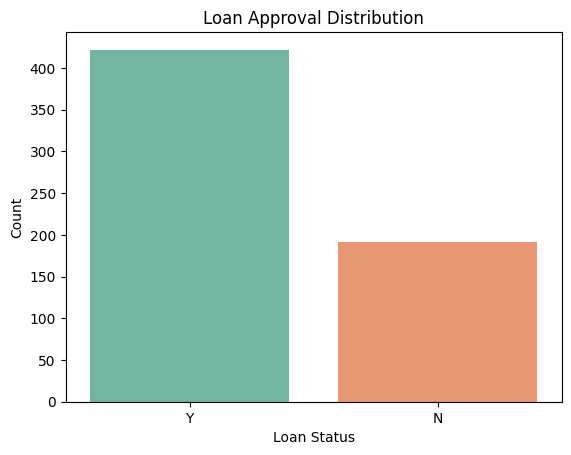

In [14]:
sns.countplot(x='Loan_Status', data=data, palette='Set2')
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

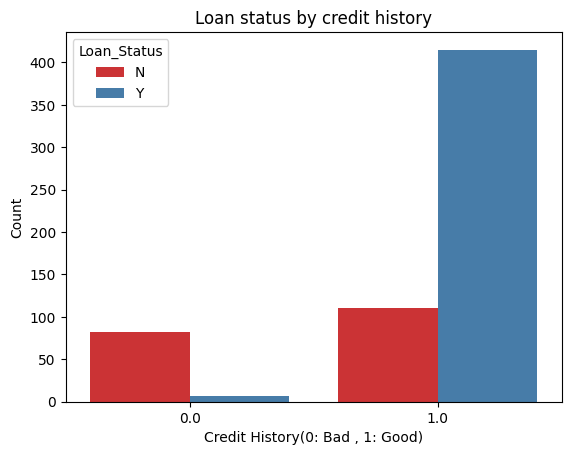

In [15]:
sns.countplot(x="Credit_History" , hue='Loan_Status' , data=data , palette='Set1')
plt.xlabel('Credit History(0: Bad , 1: Good)')
plt.title('Loan status by credit history')
plt.ylabel('Count')
plt.show()